In [1]:
import pandas as pd

In [2]:
train_data = pd.read_csv('train.csv')

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# checking null values 

train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

we know that  here  age and embraked have missing values lets solve that    and #Cabin column which have large amount of missing            i believe which is not important so i planing to frop it 

In [6]:
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].median())

In [10]:
train_data['Embarked'] = train_data['Embarked'].fillna(train_data['Embarked'].mode()[0])

In [12]:
train_data.drop('Cabin',axis=1,inplace=True)

we handled the null values in our data now all field is filkled 

In [13]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

now  we need  encode catrogrical variable(SEX)  Male and female   to 0 and 1          also scaling to make model better performance  standrized and normilzatin it

In [14]:
# Sex

train_data['Sex'] = train_data['Sex'].map({'male':0,'female':1})

In [16]:
# One-hot encode the 'Embarked' column
train_data = pd.get_dummies(train_data, columns=['Embarked'], drop_first=True)

In [17]:
# Scaling Numerical Features

from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()

# Scale the 'Age' and 'Fare' columns
train_data[['Age', 'Fare']] = scaler.fit_transform(train_data[['Age', 'Fare']])


In [18]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,-0.565736,1,0,A/5 21171,-0.502445,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0.663861,1,0,PC 17599,0.786845,False,False
2,3,1,3,"Heikkinen, Miss. Laina",1,-0.258337,0,0,STON/O2. 3101282,-0.488854,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0.433312,1,0,113803,0.420730,False,True
4,5,0,3,"Allen, Mr. William Henry",0,0.433312,0,0,373450,-0.486337,False,True


 Cleaning is over   
    
### Now we need select X (features ) and y (Target )           and split our dataset into training and test set 

#### Features selecting based on Domain knowledge  and checking variable realtionship such that.


Here im selecting variable randomly for just study purpose 


In [20]:
X = train_data[['Sex','Age','Embarked_Q','Embarked_S','Fare','Pclass','Parch','SibSp']]    # features
y = train_data['Survived']   # Target 

In [21]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Check the shape of the split data
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")

X_train shape: (712, 8), X_test shape: (179, 8)
y_train shape: (712,), y_test shape: (179,)


### Now we need build Model To Predict         choose a Model and Train it for better prediction

In [22]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

 Model Train is done now lets the prediction of our model  

In [24]:
model_prediction = model.predict(X_test)

In [25]:
model_prediction

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1], dtype=int64)

##  We have successfully created the model and maked prediction 
next we need evalute the model performance         how much accurate model preidction and etc things lets do it

In [30]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,recall_score

print("Accuracy of Our Logistic Regression Model is : ",accuracy_score(y_test,model_prediction))
print()
print("Confusion Matrix of Our Logistic Regression Model is : \n",confusion_matrix(y_test,model_prediction))
print()
print("Recall Score of Our Logistic Regression Model is : ",recall_score(y_test,model_prediction,average=None))
print()

print("Classification Report of Our Logistic Regression Model : \n ",classification_report(y_test,model_prediction))

Accuracy of Our Logistic Regression Model is :  0.8100558659217877

Confusion Matrix of Our Logistic Regression Model is : 
 [[90 15]
 [19 55]]

Recall Score of Our Logistic Regression Model is :  [0.85714286 0.74324324]

Classification Report of Our Logistic Regression Model : 
                precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



NOW LETS VISULIZA THE CONFUSION  MATRIX

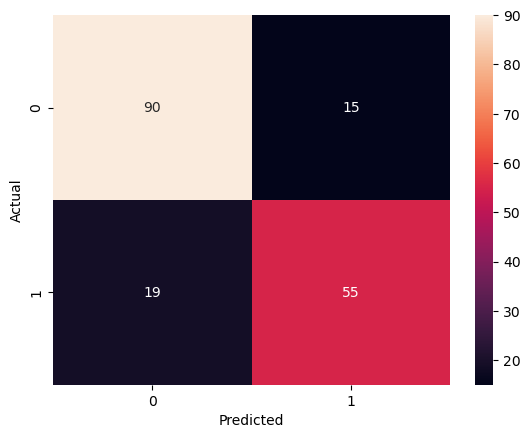

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test,model_prediction)

sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel("Actual")
plt.show()

###  DECISION TREE ALGO

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Initialize the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Predict the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt:.2f}")

# Confusion Matrix and Classification Report
cm_dt = confusion_matrix(y_test, y_pred_dt)
print("Confusion Matrix:")
print(cm_dt)

print("Classification Report:")
print(classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 0.78
Confusion Matrix:
[[86 19]
 [20 54]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.82      0.82       105
           1       0.74      0.73      0.73        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



## KNN ALGO

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Initialize the KNN classifier
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn_model.fit(X_train, y_train)

# Predict the test set
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn:.2f}")

# Confusion Matrix and Classification Report
cm_knn = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix:")
print(cm_knn)

print("Classification Report:")
print(classification_report(y_test, y_pred_knn))


KNN Accuracy: 0.82
Confusion Matrix:
[[90 15]
 [18 56]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       105
           1       0.79      0.76      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.81      0.82      0.82       179



In [38]:
print("ACCURACY OF LOGISTIC REGRESSION IS  : 81%  ")
print("ACCURACY OF DECISION TREE IS        : 78%  ")
print("ACCURACY OF K-Nearst Neighbors IS   : 82%  ")

ACCURACY OF LOGISTIC REGRESSION IS  : 81%  
ACCURACY OF DECISION TREE IS        : 78%  
ACCURACY OF K-Nearst Neighbors IS   : 82%  
